0.99961065840882


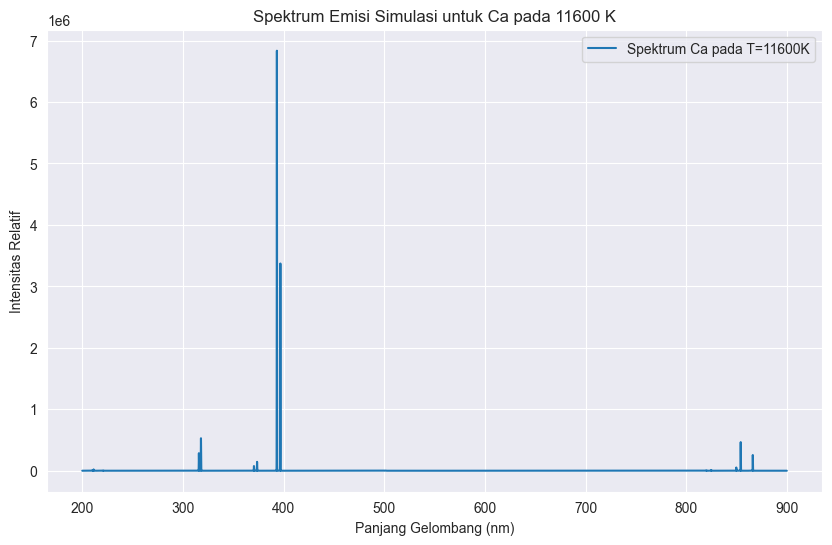


Garis Spektrum yang Digunakan:
Wavelength (nm) gA(s^-1)        Energy (eV)     Degeneracy (g_i)
------------------------------------------------------------
210.324         330000000.0     3.12335         2.0            
211.276         580000000.0     3.15098         4.0            
211.315         64000000.0      3.15098         4.0            
212.875         800000.0        1.69241         4.0            
213.151         7200000.0       1.69993         6.0            
213.23          4000000.0       1.69241         4.0            
219.779         62000000.0      3.12335         2.0            
220.861         120000000.0     3.15098         4.0            
315.887         1200000000.0    3.12335         2.0            
317.933         2200000000.0    3.15098         4.0            
318.128         230000000.0     3.15098         4.0            
370.603         180000000.0     3.12335         2.0            
373.69          340000000.0     3.15098         4.0            
393.366   

In [1]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from selenium.webdriver.common.devtools.v85.fetch import continue_request
class a:
    def get_spectral_data(db_path, element, sp_num):
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        query = """
            SELECT "obs_wl_air(nm)", "gA(s^-1)", "Ek(cm-1)", "Ei(cm-1)", "g_i", "g_k"
            FROM spectrum_data
            WHERE element = ? AND sp_num = ?
        """
        cursor.execute(query, (element, sp_num))
        data = cursor.fetchall()
        conn.close()
        return data
class b:
    def calculate_intensity(T, energy, degeneracy, einstein_coeff, Z):
        k_B = 8.617333262145e-5
        intesity = (degeneracy*(np.exp(-energy / (k_B * T)))*einstein_coeff)/Z
        return intesity
    def partition_function(energy_levels, degeneracies, T):
        k_B = 8.617333262145e-5
        Z = np.sum([g * np.exp(-E / (k_B * T)) for g, E in zip(degeneracies, energy_levels)])
        return Z
    def gaussian_profile(x, center, sigma):
        return np.exp(-0.5 * ((x - center) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))
    def simulate_spectrum(db_path, element, sp_num, temperature, resolution=24880):
        spectral_data = a.get_spectral_data(db_path, element, sp_num)
        wavelengths = np.linspace(200, 900, resolution)
        intensities = np.zeros_like(wavelengths)
    
        energy_levels = []
        degeneracies = []
        selected_lines = []
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek, Ei = float(Ek), float(Ei)
                    Ei = Ei / 8065.544
                    gi = float(gi)
                    energy_levels.append(Ei)
                    degeneracies.append(gi)
                    selected_lines.append((wl, gA, Ei, gi))
                except ValueError:
                    continue
    
        Z = b.partition_function(energy_levels, degeneracies, temperature)
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek = float(Ek)
                    Ek = Ek / 8065.544
                    gi = float(gi)
                    gk = float(gk)
                    Aki = gA/gk
                    intensity = b.calculate_intensity(temperature, Ek, gk, Aki, Z)
                    sigma = 0.1
                    intensities += intensity * b.gaussian_profile(wavelengths, wl, sigma)
                except ValueError:
                    continue
    
        return wavelengths, intensities, selected_lines
class c:
    def plot_spectrum(db_path, element, sp_num, temperature, resolution=24880):
        wavelengths, intensities, selected_lines = b.simulate_spectrum(db_path, element, sp_num, temperature, resolution)
        plt.figure(figsize=(10, 6))
        plt.plot(wavelengths, intensities, label=f'Spektrum {element} pada T={temperature}K')
        plt.xlabel("Panjang Gelombang (nm)")
        plt.ylabel("Intensitas Relatif")
        plt.title(f"Spektrum Emisi Simulasi untuk {element} pada {temperature} K")
        plt.legend()
        plt.grid(True)
        plt.show()
        print("\nGaris Spektrum yang Digunakan:")
        print(f"{'Wavelength (nm)':<15} {'gA(s^-1)':<15} {'Energy (eV)':<15} {'Degeneracy (g_i)':<15}")
        print("-" * 60)
        for line in selected_lines:
            wl, gA, energy, gi = line
            print(f"{wl:<15} {gA:<15} {energy:<15.5f} {gi:<15}")

db_path = 'data1.db'
element = 'Ca'
sp_num = 2
temperature = 11600
k_B = 8.617333262145e-5
t = temperature * k_B
print(float(t))
c.plot_spectrum(db_path, element, sp_num, temperature)

In [ ]:
import sqlite3

def print_table_header(db_path, table_name):
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Query untuk mengambil nama kolom dari tabel yang diberikan
    query = f"PRAGMA table_info({table_name})"
    cursor.execute(query)
    
    # Mendapatkan nama kolom dari hasil query
    columns = [info[1] for info in cursor.fetchall()]
    
    # Cetak nama kolom
    print(f"Header dari tabel '{table_name}':")
    print(columns)
    
    conn.close()

# Contoh penggunaan
db_path = 'data1.db'   # Path ke database
table_name = 'spectrum_data'  # Nama tabel yang ingin diperiksa
print_table_header(db_path, table_name)

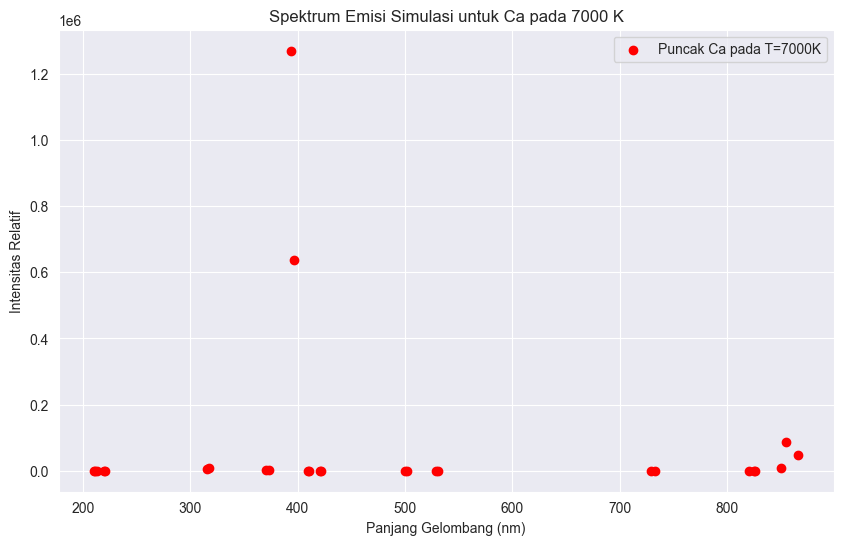


Garis Spektrum yang Digunakan:
Wavelength (nm) gA(s^-1)        Energy (eV)     Degeneracy (g_i)
------------------------------------------------------------
210.324         330000000.0     3.12335         2.0            
211.276         580000000.0     3.15098         4.0            
211.315         64000000.0      3.15098         4.0            
212.875         800000.0        1.69241         4.0            
213.151         7200000.0       1.69993         6.0            
213.23          4000000.0       1.69241         4.0            
219.779         62000000.0      3.12335         2.0            
220.861         120000000.0     3.15098         4.0            
315.887         1200000000.0    3.12335         2.0            
317.933         2200000000.0    3.15098         4.0            
318.128         230000000.0     3.15098         4.0            
370.603         180000000.0     3.12335         2.0            
373.69          340000000.0     3.15098         4.0            
393.366   

In [6]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

class a:
    @staticmethod
    def get_spectral_data(db_path, element, sp_num):
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        query = """
            SELECT "obs_wl_air(nm)", "gA(s^-1)", "Ek(cm-1)", "Ei(cm-1)", "g_i", "g_k"
            FROM spectrum_data
            WHERE element = ? AND sp_num = ?
        """
        cursor.execute(query, (element, sp_num))
        data = cursor.fetchall()
        conn.close()
        return data

class b:
    @staticmethod
    def calculate_intensity(T, energy, degeneracy, einstein_coeff, Z):
        k_B = 8.617333262145e-5
        intensity = (degeneracy * np.exp(-energy / (k_B * T)) * einstein_coeff) / Z
        return intensity

    @staticmethod
    def partition_function(energy_levels, degeneracies, T):
        k_B = 8.617333262145e-5
        Z = np.sum([g * np.exp(-E / (k_B * T)) for g, E in zip(degeneracies, energy_levels)])
        return Z

    @staticmethod
    def gaussian_profile(x, center, sigma):
        return np.exp(-0.5 * ((x - center) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

    @staticmethod
    def simulate_spectrum(db_path, element, sp_num, temperature, resolution=24880):
        spectral_data = a.get_spectral_data(db_path, element, sp_num)
        wavelengths = np.linspace(200, 900, resolution)
        intensities = np.zeros_like(wavelengths)
    
        energy_levels = []
        degeneracies = []
        selected_lines = []
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek, Ei = float(Ek), float(Ei)
                    Ei = Ei / 8065.544
                    gi = float(gi)
                    energy_levels.append(Ei)
                    degeneracies.append(gi)
                    selected_lines.append((wl, gA, Ei, gi))
                except ValueError:
                    continue
    
        Z = b.partition_function(energy_levels, degeneracies, temperature)
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek = float(Ek)
                    Ek = Ek / 8065.544
                    gi = float(gi)
                    gk = float(gk)
                    Aki = gA / gk
                    intensity = b.calculate_intensity(temperature, Ek, gk, Aki, Z)
                    sigma = 0.1
                    intensities += intensity * b.gaussian_profile(wavelengths, wl, sigma)
                except ValueError:
                    continue
    
        return wavelengths, intensities, selected_lines

class c:
    @staticmethod
    def plot_spectrum(db_path, element, sp_num, temperature, resolution=24880):
        wavelengths, intensities, selected_lines = b.simulate_spectrum(db_path, element, sp_num, temperature, resolution)
        
        # Cari titik puncak intensitas
        peaks, _ = find_peaks(intensities, prominence=0.01)  # Sesuaikan 'prominence' jika diperlukan

        # Plot hanya titik puncak
        plt.figure(figsize=(10, 6))
        plt.scatter(wavelengths[peaks], intensities[peaks], color='red', label=f'Puncak {element} pada T={temperature}K')
        plt.xlabel("Panjang Gelombang (nm)")
        plt.ylabel("Intensitas Relatif")
        plt.title(f"Spektrum Emisi Simulasi untuk {element} pada {temperature} K")
        plt.legend()
        plt.grid(True)
        plt.show()

        print("\nGaris Spektrum yang Digunakan:")
        print(f"{'Wavelength (nm)':<15} {'gA(s^-1)':<15} {'Energy (eV)':<15} {'Degeneracy (g_i)':<15}")
        print("-" * 60)
        for line in selected_lines:
            wl, gA, energy, gi = line
            print(f"{wl:<15} {gA:<15} {energy:<15.5f} {gi:<15}")

# Konfigurasi untuk memplot spektrum
db_path = 'data1.db'
element = 'Ca'
sp_num = 2
temperature = 7000
c.plot_spectrum(db_path, element, sp_num, temperature)

In [13]:
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

class a:
    @staticmethod
    def get_spectral_data(db_path, element, sp_num):
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        query = """
            SELECT "obs_wl_air(nm)", "gA(s^-1)", "Ek(cm-1)", "Ei(cm-1)", "g_i", "g_k"
            FROM spectrum_data
            WHERE element = ? AND sp_num = ?
        """
        cursor.execute(query, (element, sp_num))
        data = cursor.fetchall()
        conn.close()
        return data

class b:
    @staticmethod
    def calculate_intensity(T, energy, degeneracy, einstein_coeff, Z):
        k_B = 8.617333262145e-5
        intensity = (degeneracy * np.exp(-energy / (k_B * T)) * einstein_coeff) / Z
        return intensity

    @staticmethod
    def partition_function(energy_levels, degeneracies, T):
        k_B = 8.617333262145e-5
        Z = np.sum([g * np.exp(-E / (k_B * T)) for g, E in zip(degeneracies, energy_levels)])
        return Z

    @staticmethod
    def gaussian_profile(x, center, sigma):
        return np.exp(-0.5 * ((x - center) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))

    @staticmethod
    def simulate_spectrum(db_path, element, sp_num, temperature, resolution=24880):
        spectral_data = a.get_spectral_data(db_path, element, sp_num)
        wavelengths = np.linspace(200, 900, resolution)
        intensities = np.zeros_like(wavelengths)
    
        energy_levels = []
        degeneracies = []
        selected_lines = []
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek, Ei = float(Ek), float(Ei)
                    Ei = Ei / 8065.544
                    gi = float(gi)
                    energy_levels.append(Ei)
                    degeneracies.append(gi)
                    selected_lines.append((wl, gA, Ei, gi))
                except ValueError:
                    continue
    
        Z = b.partition_function(energy_levels, degeneracies, temperature)
    
        for wl, gA, Ek, Ei, gi, gk in spectral_data:
            if all(value is not None and value != '' for value in [wl, gA, Ek, Ei, gi, gk]):
                try:
                    wl = float(wl)
                    gA = float(gA)
                    Ek = float(Ek)
                    Ek = Ek / 8065.544
                    gi = float(gi)
                    gk = float(gk)
                    Aki = gA / gk
                    intensity = b.calculate_intensity(temperature, Ek, gk, Aki, Z)
                    sigma = 0.1
                    intensities += intensity * b.gaussian_profile(wavelengths, wl, sigma)
                except ValueError:
                    continue
    
        return wavelengths, intensities, selected_lines

class c:
    @staticmethod
    def save_full_spectrum(db_path, element, sp_num, temperature, output_db_path, resolution=24880):
        wavelengths, intensities, selected_lines = b.simulate_spectrum(db_path, element, sp_num, temperature, resolution)
        
        # Buat koneksi ke database baru untuk menyimpan spektrum lengkap
        conn = sqlite3.connect(output_db_path)
        cursor = conn.cursor()
        cursor.execute("""
            CREATE TABLE IF NOT EXISTS full_spectrum (
                element TEXT,
                sp_num INTEGER,
                temperature REAL,
                wavelength REAL,
                intensity REAL
            )
        """)
        
        # Simpan seluruh data spektrum ke dalam database
        full_spectrum_data = [(element, sp_num, temperature, wavelengths[i], intensities[i]) for i in range(len(wavelengths))]
        cursor.executemany("""
            INSERT INTO full_spectrum (element, sp_num, temperature, wavelength, intensity)
            VALUES (?, ?, ?, ?, ?)
        """, full_spectrum_data)
        conn.commit()
        conn.close()

# Konfigurasi elemen, tahap ionisasi, dan suhu
elements = ['Fe', 'O', 'Na', 'Ca', 'Mg', 'Si', 'Al', 'K', 'Ti', 'Cr']
ion_stages = [1, 2]
temperatures = list(range(6000, 20001, 500))  # Dari 6000 K hingga 20000 K, interval 500 K
output_db_path = 'full_spectrum.db'  # Database untuk menyimpan spektrum lengkap
db_path = 'data1.db'  # Path ke database sumber spektrum

# Loop melalui setiap elemen, tahap ionisasi, dan suhu
for element in elements:
    for sp_num in ion_stages:
        for temperature in temperatures:
            print(f"Menyimpan spektrum untuk {element}, tahap ionisasi {sp_num}, suhu {temperature}K")
            c.save_full_spectrum(db_path, element, sp_num, temperature, output_db_path)

Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 6000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 6500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 7000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 7500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 8000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 8500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 9000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 9500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 10000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 10500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 11000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 11500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 12000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 12500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 13000K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 13500K
Menyimpan spektrum untuk Fe, tahap ionisasi 1, suhu 14000K
Menyi

In [15]:
import sqlite3
import pandas as pd

def replace_wavelength_with_timestep(db_path):
    # Membuat koneksi ke database
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    
    # Membaca data dari tabel full_spectrum
    query = "SELECT * FROM full_spectrum"
    df = pd.read_sql_query(query, conn)
    
    # Mengganti kolom 'wavelength' dengan 'timestep' (1 hingga 24880 untuk setiap kombinasi elemen, sp_num, dan temperature)
    df['timestep'] = df.groupby(['element', 'sp_num', 'temperature']).cumcount() + 1
    
    # Menghapus kolom 'wavelength' dan menyusun ulang kolom
    df = df.drop(columns=['wavelength'])
    df = df[['element', 'sp_num', 'temperature', 'timestep', 'intensity']]
    
    # Membuat tabel baru untuk menyimpan data dengan timestep
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS full_spectrum_with_timestep (
            element TEXT,
            sp_num INTEGER,
            temperature REAL,
            timestep INTEGER,
            intensity REAL
        )
    """)
    
    # Memasukkan data baru ke tabel full_spectrum_with_timestep
    df.to_sql('full_spectrum_with_timestep', conn, if_exists='replace', index=False)
    
    # Menutup koneksi
    conn.close()
    print("Data berhasil disimpan dengan timestep.")

# Path ke database
db_path = 'full_spectrum.db'

# Jalankan fungsi untuk mengganti nilai panjang gelombang dengan timestep
replace_wavelength_with_timestep(db_path)

Data berhasil disimpan dengan timestep.


In [6]:
import sqlite3
import pandas as pd
import random

def view_spectral_peaks_db(db_path):
    # Membuat koneksi ke database
    conn = sqlite3.connect(db_path)
    
    # Membaca data dari tabel full_spectrum_with_timestep ke dalam DataFrame pandas
    query = "SELECT * FROM full_spectrum_with_timestep"
    df = pd.read_sql_query(query, conn)
    
    # Menutup koneksi database
    conn.close()
    
    return df

def export_random_features_to_excel(df, output_path, num_features=4):
    # Memilih suhu dan elemen secara acak
    unique_temperatures = df['temperature'].unique()
    unique_elements = df['element'].unique()
    random_temperature = random.choice(unique_temperatures)
    random_element = random.choice(unique_elements)
    
    # Filter data berdasarkan elemen dan suhu yang dipilih
    filtered_df = df[(df['temperature'] == random_temperature) & (df['element'] == random_element)]
    
    # Memilih 4 fitur (kolom intensitas) secara acak
    if len(filtered_df.columns) > num_features + 1:
        random_columns = random.sample(list(filtered_df.columns[2:]), num_features)  # Ambil 4 fitur acak, mulai dari kolom ke-3 (indeks 2) untuk menghindari kolom non-fitur
        selected_columns = ['timestep'] + random_columns
        export_df = filtered_df[selected_columns]
    else:
        export_df = filtered_df  # Jika kolom fitur kurang dari jumlah yang diinginkan, ekspor semua
    
    # Ekspor ke Excel
    export_df.to_excel(output_path, index=False)
    print(f"Data berhasil diekspor ke {output_path} dengan suhu {random_temperature} dan elemen {random_element}")

# Konfigurasi path database dan nama file Excel
db_path = 'full_spectrum.db'
output_excel_path = 'random_spectral_peaks.xlsx'

# Ambil data dari database
spectral_peaks_df = view_spectral_peaks_db(db_path)

# Ekspor ke Excel dengan memilih 4 fitur dan suhu secara acak
export_random_features_to_excel(spectral_peaks_df, output_excel_path)

Data berhasil diekspor ke random_spectral_peaks.xlsx dengan suhu 14000.0 dan elemen Mg


In [5]:
import sqlite3
import pandas as pd

def view_spectral_peaks_db(db_path):
    # Membuat koneksi ke database
    conn = sqlite3.connect(db_path)
    
    # Membaca data dari tabel spectral_peaks ke dalam DataFrame pandas
    query = "SELECT * FROM full_spectrum_with_timestep"
    df = pd.read_sql_query(query, conn)
    
    # Menutup koneksi database
    conn.close()
    
    # Menampilkan isi tabel
    print("Isi Tabel spectral_peaks:")
    print(df)
    
    # Mengembalikan DataFrame jika ingin digunakan lebih lanjut
    return df

# Konfigurasi path database
db_path = 'full_spectrum.db'

# Melihat isi database
spectral_peaks_df = view_spectral_peaks_db(db_path)

Isi Tabel spectral_peaks:
         element  sp_num  temperature  timestep  intensity
0             Ca       2      11600.0         1        0.0
1             Ca       2      11600.0         2        0.0
2             Ca       2      11600.0         3        0.0
3             Ca       2      11600.0         4        0.0
4             Ca       2      11600.0         5        0.0
...          ...     ...          ...       ...        ...
14455275      Cr       2      20000.0     24876        0.0
14455276      Cr       2      20000.0     24877        0.0
14455277      Cr       2      20000.0     24878        0.0
14455278      Cr       2      20000.0     24879        0.0
14455279      Cr       2      20000.0     24880        0.0

[14455280 rows x 5 columns]


In [24]:
import tkinter as tk
from tkinter import ttk, messagebox
import sqlite3
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import joblib

# Load the MultiLabelBinarizer encoders
mlb_elements = joblib.load('mlb_elements.joblib')
mlb_ion_stage = joblib.load('mlb_ion_stage.joblib')

# Extract categories for the combobox selections
elements = mlb_elements.classes_.tolist()
ion_stages = list(map(int, mlb_ion_stage.classes_))
temperatures = list(range(6000, 20000, 100))

# Construct sample_key based on the element, ion_stage, and temperature
def generate_sample_key(element, ion_stage, temperature):
    return f"{element}_{ion_stage}_{temperature}"

# Function to plot spectrum with discrete intensity points
def plot_spectrum(db_path, element, ion_stage, temperature, canvas_container):
    sample_key = generate_sample_key(element, ion_stage, temperature)

    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    cursor.execute("""
        SELECT timestep, intensity
        FROM simulated_spectra
        WHERE sample_key = ?
        ORDER BY timestep
    """, (sample_key,))
    data = cursor.fetchall()
    conn.close()

    if data:
        # Pastikan data numerik untuk menghindari error decoding
        timesteps, intensities = zip(*[(int(t), float(i)) for t, i in data])
        
        fig = plt.Figure(figsize=(8, 6))
        ax = fig.add_subplot(111)
        
        # Plot hanya titik tanpa garis
        ax.scatter(timesteps, intensities, label=f'{element} Ion Stage {ion_stage}', color='blue')
        
        ax.set_xlabel('Timestep')
        ax.set_ylabel('Intensity')
        ax.set_title(f'Spectrum for {element} Ion Stage {ion_stage} at T={temperature}K')
        ax.legend()
        ax.grid()

        # Clear previous plots
        for widget in canvas_container.winfo_children():
            widget.destroy()

        canvas = FigureCanvasTkAgg(fig, master=canvas_container)
        canvas.draw()
        canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
    else:
        messagebox.showerror("Data Not Found", "No data found for the specified parameters.")

# Main application window
root = tk.Tk()
root.title("Spectrum Plotter")

input_frame = ttk.Frame(root)
input_frame.pack(side=tk.TOP, fill=tk.X, padx=10, pady=10)

plot_frame = ttk.Frame(root)
plot_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=1)

# User interface components
element_label = ttk.Label(input_frame, text="Element:")
element_label.grid(row=0, column=0, padx=5, pady=5, sticky=tk.W)
element_var = tk.StringVar()
element_combo = ttk.Combobox(input_frame, textvariable=element_var)
element_combo['values'] = elements
element_combo.current(0)
element_combo.grid(row=0, column=1, padx=5, pady=5)

ion_stage_label = ttk.Label(input_frame, text="Ion Stage:")
ion_stage_label.grid(row=1, column=0, padx=5, pady=5, sticky=tk.W)
ion_stage_var = tk.IntVar()
ion_stage_combo = ttk.Combobox(input_frame, textvariable=ion_stage_var)
ion_stage_combo['values'] = ion_stages
ion_stage_combo.current(0)
ion_stage_combo.grid(row=1, column=1, padx=5, pady=5)

temperature_label = ttk.Label(input_frame, text="Temperature (K):")
temperature_label.grid(row=2, column=0, padx=5, pady=5, sticky=tk.W)
temperature_var = tk.IntVar()
temperature_combo = ttk.Combobox(input_frame, textvariable=temperature_var)
temperature_combo['values'] = temperatures
temperature_combo.current(0)
temperature_combo.grid(row=2, column=1, padx=5, pady=5)

# Function to handle plot button click
def on_plot_button_click():
    element = element_var.get()
    ion_stage = int(ion_stage_var.get())
    temperature = int(temperature_var.get())
    db_path = 'simulated_spectra.db'

    plot_spectrum(db_path, element, ion_stage, temperature, plot_frame)

plot_button = ttk.Button(input_frame, text="Plot Spectrum", command=on_plot_button_click)
plot_button.grid(row=3, column=0, columnspan=2, pady=10)

root.mainloop()

In [13]:
import numpy as np
import sqlite3
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import joblib
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, LSTM

# Definisi Spectral Normalized LSTM
class SpectralNormalizedLSTM(Layer):
    def __init__(self, units, power_iterations=1, **kwargs):
        super(SpectralNormalizedLSTM, self).__init__(**kwargs)
        self.units = units
        self.power_iterations = power_iterations
        self.lstm = LSTM(units, return_sequences=False, use_bias=True)

    def build(self, input_shape):
        # Buat kernel untuk LSTM
        self.lstm.build(input_shape)
        
        # Dapatkan kernel LSTM yang ingin dinormalisasi
        self.kernel = self.lstm.cell.kernel  # Matriks kernel utama
        self.recurrent_kernel = self.lstm.cell.recurrent_kernel  # Kernel berulang
        
        # Tambahkan vektor u untuk power iteration pada setiap kernel
        self.u_kernel = self.add_weight(shape=(1, self.kernel.shape[-1]),
                                        initializer='random_normal',
                                        trainable=False, name='u_kernel')
        
        self.u_recurrent = self.add_weight(shape=(1, self.recurrent_kernel.shape[-1]),
                                           initializer='random_normal',
                                           trainable=False, name='u_recurrent')

    def spectral_norm(self, w, u):
        for _ in range(self.power_iterations):
            v = K.l2_normalize(K.dot(u, K.transpose(w)))
            u = K.l2_normalize(K.dot(v, w))
        sigma = K.dot(K.dot(v, w), K.transpose(u))
        return w / sigma, u

    def call(self, inputs):
        # Normalisasi kernel LSTM
        normalized_kernel, updated_u_kernel = self.spectral_norm(self.kernel, self.u_kernel)
        normalized_recurrent_kernel, updated_u_recurrent = self.spectral_norm(self.recurrent_kernel, self.u_recurrent)
        
        # Update kernel dengan versi yang sudah dinormalisasi
        self.lstm.cell.kernel = normalized_kernel
        self.lstm.cell.recurrent_kernel = normalized_recurrent_kernel

        # Simpan u terbaru untuk power iteration berikutnya
        self.u_kernel.assign(updated_u_kernel)
        self.u_recurrent.assign(updated_u_recurrent)

        # Panggil layer LSTM dengan kernel yang sudah dinormalisasi
        return self.lstm(inputs)


# Konfigurasi database
db_path = 'full_spectrum.db'
resolution = 24880  
elements = ['Fe', 'O', 'Na', 'Ca', 'Mg', 'Si', 'Al', 'K', 'Ti', 'Cr']
ion_stages = [1, 2]
temperatures = list(range(6000, 20001, 500))

# Inisialisasi label encoder
mlb = MultiLabelBinarizer()
labels = [(element, str(ion_stage)) for element in elements for ion_stage in ion_stages]  
mlb.fit(labels)

# Fungsi untuk memuat data
def load_data_from_db(db_path, elements, ion_stages, temperatures, resolution):
    conn = sqlite3.connect(db_path)
    data = []
    labels = []

    for element in elements:
        for ion_stage in ion_stages:
            for temperature in temperatures:
                query = """
                    SELECT timestep, intensity FROM full_spectrum_with_timestep 
                    WHERE element = ? AND sp_num = ? AND temperature = ? 
                    ORDER BY timestep
                """
                df = pd.read_sql_query(query, conn, params=(element, ion_stage, temperature))

                # Pastikan data memiliki jumlah timestep yang diharapkan
                if len(df) == resolution:
                    data.append(df['intensity'].values)
                    labels.append((element, str(ion_stage)))  # Label elemen dan ion stage

    conn.close()
    return np.array(data), mlb.transform(labels)

# Memuat dan menormalkan data
X, Y = load_data_from_db(db_path, elements, ion_stages, temperatures, resolution)
X = X.reshape(-1, resolution, 1)  

scaler = MinMaxScaler()
X_normalized = []
for spectrum in X:
    normalized_spectrum = scaler.fit_transform(spectrum).flatten()
    X_normalized.append(normalized_spectrum)
X_normalized = np.array(X_normalized).reshape(-1, resolution, 1)

# Membangun model dengan Spectral Normalization
num_classes = Y.shape[1] 
model = Sequential()
model.add(SpectralNormalizedLSTM(64, input_shape=(resolution, 1)))
model.add(Dense(num_classes, activation='sigmoid'))  
model.compile(optimizer=Adam(), loss='cate_crossentropy', metrics=['accuracy'])

# Menampilkan summary model
model.summary()

# Melatih model
history = model.fit(X_normalized, Y, epochs=20, batch_size=64, validation_split=0.4)

# Menyimpan model dan encoder
model.save("spectral_model_with_elements_ion_stage.h5")
joblib.dump(mlb, "element_ion_stage_binarizer.joblib")
joblib.dump(scaler, "scaler.joblib")

print("Model dan encoder berhasil disimpan.")

/var/folders/6h/9dyt7k995lxfs8jyls0_pss80000gn/T/ipykernel_28180/2129556400.py:15: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(SpectralNormalizedLSTM, self).__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spectral_normalized_lstm        │ (None, 64)             │        17,408 │
│ (SpectralNormalizedLSTM)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           780 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,188 (71.05 KB)

 Trainable params: 17,676 (69.05 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 12s/step - accuracy: 0.3882 - loss: 0.6910 - val_accuracy: 0.5000 - val_loss: 0.6812
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 63s 11s/step - accuracy: 0.5019 - loss: 0.6727 - val_accuracy: 0.5000 - val_loss: 0.6574
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 14s/step - accuracy: 0.5434 - loss: 0.6512 - val_accuracy: 0.5000 - val_loss: 0.6124
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 81s 14s/step - accuracy: 0.5119 - loss: 0.5836 - val_accuracy: 0.5000 - val_loss: 0.5261
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 70s 12s/step - accuracy: 0.5048 - loss: 0.4962 - val_accuracy: 0.5000 - val_loss: 0.4764
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 83s 13s/step - accuracy: 0.5109 - loss: 0.4459 - val_accuracy: 0.5000 - val_loss: 0.4467
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 82s 15s/step - accuracy: 0.4958 - loss: 0.4147 - val_accuracy: 0.5000 - val_loss: 0.4298
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 54s 9s/step - accuracy: 0.4870 - loss: 0.3965 - val_accuracy: 0.5000 - val_loss: 0.4239
E

Model dan encoder berhasil disimpan.


In [19]:
import numpy as np
import sqlite3
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, MultiLabelBinarizer
import joblib
import random
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer, LSTM

# Definisi layer custom SpectralNormalizedLSTM
class SpectralNormalizedLSTM(Layer):
    def __init__(self, units, power_iterations=1, **kwargs):
        super(SpectralNormalizedLSTM, self).__init__(**kwargs)
        self.units = units
        self.power_iterations = power_iterations
        self.lstm = LSTM(units, return_sequences=False, use_bias=True)

    def build(self, input_shape):
        self.lstm.build(input_shape)
        self.kernel = self.lstm.cell.kernel
        self.recurrent_kernel = self.lstm.cell.recurrent_kernel
        self.u_kernel = self.add_weight(shape=(1, self.kernel.shape[-1]),
                                        initializer='random_normal',
                                        trainable=False, name='u_kernel')
        self.u_recurrent = self.add_weight(shape=(1, self.recurrent_kernel.shape[-1]),
                                           initializer='random_normal',
                                           trainable=False, name='u_recurrent')

    def spectral_norm(self, w, u):
        for _ in range(self.power_iterations):
            v = K.l2_normalize(K.dot(u, K.transpose(w)))
            u = K.l2_normalize(K.dot(v, w))
        sigma = K.dot(K.dot(v, w), K.transpose(u))
        return w / sigma, u

    def call(self, inputs):
        normalized_kernel, updated_u_kernel = self.spectral_norm(self.kernel, self.u_kernel)
        normalized_recurrent_kernel, updated_u_recurrent = self.spectral_norm(self.recurrent_kernel, self.u_recurrent)
        self.lstm.cell.kernel = normalized_kernel
        self.lstm.cell.recurrent_kernel = normalized_recurrent_kernel
        self.u_kernel.assign(updated_u_kernel)
        self.u_recurrent.assign(updated_u_recurrent)
        return self.lstm(inputs)

# Database path
db_path = 'full_spectrum.db'
resolution = 24880
elements = ['Fe', 'O', 'Na', 'Ca', 'Mg', 'Si', 'Al', 'K', 'Ti', 'Cr']
ion_stages = [1, 2]
temperatures = list(range(6000, 20001, 500))

# Gabungkan elemen dan ion stage sebagai satu label
labels = [f"{element}_{ion_stage}" for element in elements for ion_stage in ion_stages]
mlb = MultiLabelBinarizer()
mlb.fit([[label] for label in labels])  # Fit dengan kombinasi elemen-ion stage

# Fungsi untuk memuat spektrum acak dari database
def load_random_spectrum(db_path, elements, ion_stages, temperatures, resolution):
    conn = sqlite3.connect(db_path)
    random_element = random.choice(elements)
    random_ion_stage = random.choice(ion_stages)
    random_temperature = random.choice(temperatures)

    query = """
        SELECT timestep, intensity FROM full_spectrum_with_timestep 
        WHERE element = ? AND sp_num = ? AND temperature = ? 
        ORDER BY timestep
    """
    df = pd.read_sql_query(query, conn, params=(random_element, random_ion_stage, random_temperature))
    conn.close()

    if len(df) == resolution:
        label = f"{random_element}_{random_ion_stage}"
        return df['intensity'].values, [label], random_temperature
    else:
        return load_random_spectrum(db_path, elements, ion_stages, temperatures, resolution)

# Membuat model baru dengan jumlah output yang sesuai
num_classes = len(mlb.classes_)
model = Sequential([
    SpectralNormalizedLSTM(64, input_shape=(resolution, 1)),
    Dense(num_classes, activation='sigmoid')  # Output 20 kelas sesuai jumlah kombinasi elemen-ion
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Normalisasi dan transformasi untuk data pelatihan dan prediksi
scaler = MinMaxScaler()
X, Y, _ = load_random_spectrum(db_path, elements, ion_stages, temperatures, resolution)  # Abaikan temperature dengan '_'
X = X.reshape(-1, 1)
scaler.fit(X)  # Fit scaler dengan data acak untuk memastikan range sesuai

# Fungsi untuk melakukan prediksi
def predict_spectrum():
    X_random, true_label, temperature = load_random_spectrum(db_path, elements, ion_stages, temperatures, resolution)
    X_random = X_random.reshape(-1, 1)

    # Normalisasi spektrum
    X_normalized = scaler.transform(X_random).flatten().reshape(1, resolution, 1)

    # Prediksi menggunakan model
    prediction = model.predict(X_normalized)

    # Interpretasikan prediksi dengan threshold untuk multilabel
    predicted_labels = mlb.inverse_transform((prediction > 0.5).astype(int))

    # Menampilkan hasil
    print("Spektrum acak untuk prediksi:")
    print(f"True Label: {true_label}")
    print(f"Temperature: {temperature}")
    print(f"Predicted Label: {predicted_labels}")

# Memanggil fungsi prediksi
predict_spectrum()

/var/folders/6h/9dyt7k995lxfs8jyls0_pss80000gn/T/ipykernel_28180/3505106127.py:16: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(SpectralNormalizedLSTM, self).__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
Spektrum acak untuk prediksi:
True Label: ['Ti_2']
Temperature: 7000
Predicted Label: [()]


In [1]:
import sqlite3

# Function to check and display headers of tables in the database
def check_db_headers(db_path):
    with sqlite3.connect(db_path) as conn:
        cursor = conn.cursor()
        
        # Retrieve all table names
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        
        # For each table, retrieve and print column names
        for table in tables:
            table_name = table[0]
            print(f"Table: {table_name}")
            
            # Retrieve column names
            cursor.execute(f"PRAGMA table_info({table_name});")
            columns = cursor.fetchall()
            
            # Display column names
            headers = [column[1] for column in columns]
            print("Columns:", headers)
            print()

# Path to the database
db_path = 'simulated_spectra.db'
check_db_headers(db_path)

Table: simulated_spectra
Columns: ['sample_key', 'timestep', 'intensity']

